# UK sea level sensitivities computed with ECCOv4

This notebook can be found in the GitHub repository https://github.com/NoraLoose/pyECCO

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import xmitgcm
import ecco_v4_py

## UK coast mask

This is the spatial mask I used to compute UK sea level. (The second plot is the same as the first, but with overlaid continents so we can orient ourselves.)

<img src="figures/UK_coast_mask_noLand.png" alt="Drawing" style="width: 400px;"/>
<img src="figures/UK_coast_mask.png" alt="Drawing" style="width: 400px;"/>

The mask encircles the UK, using 1 grid point in width of the ECCOv4 grid. This is just a reminder that ECCOv4 is a relatively coarse model (nominally 1$^\circ$ resolution). 

## Definition of objective function

Our objective function is defined as follows:
$$
    \eta_\text{UK} = \text{Average UK sea level in March},
$$

where a time average is taken over March 1996, and a spatial average over the UK coast mask (yellow) shown above. (*Note: Evaluation period could be easily changed to a different month or year, see notes at bottom of notebook.*)

## Open adjoint sensitivities

In [2]:
ds = xr.open_dataset('datasets/monthlyEtaUK_weeklySens_latlon.nc')

## Sensitivity frequency

I computed the sensitivity of $\eta_{UK}$ to changes in weekly mean wind stress. The netcdf file *monthlyEtaUK_weeklySens_latlon.nc* contains **205 time records**: 
* The **last** time **record** corresponds to a **lead time of 1 week**. That is, this record contains the sensitivity of $\eta_{UK}$ to changes in wind stress in the last week of March of 1996. 
* The **second to last** time **record** corresponds to a **lead time of 2 weeks**. That is, this record contains the sensitivity of $\eta_{UK}$ to changes in wind stress in the second to last week of March of 1996. 
* ...
* The **first** time **record** corresponds to a **lead time of 205 weeks**.

Let's look at an example:
### Lead time: 1 week

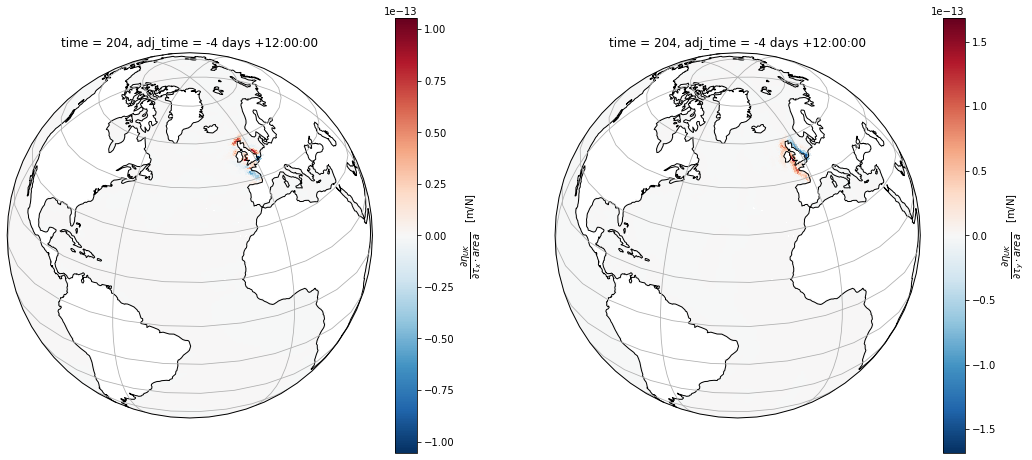

In [3]:
mytime = 204 # last record (since python starts counting from 0)
fig,axs = plt.subplots(1,2,figsize=(18,8),
                      subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35,central_latitude=30)})


ds['etaUK_coast_adxx_taux'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_x \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_taux'].units + ']'}, 
                                            ax=axs[0])
                                         
ds['etaUK_coast_adxx_tauy'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[1]) 

for ax in axs.flatten():
    ax.coastlines()
    ax.gridlines()

An example of **how to read the sensitivity maps** (here for a lead time of 1 week):

The sensitivity to meridional wind stress (right figure) shows a meridional uniform band of positive sensitivity extending along the western UK coast southward to Spain, with a maximum amplitude of approximately $1.5*10^{-13} m/N$. This reads as follows:

Increasing the weekly-mean southerly wind stress 
* by **$0.1 N/m^2$** in the last week of March 1996
* from 60N (Northern UK tip) to 40N (Spain) along the band of constant longitude (~ $5^\circ W$) that shows the positive sensitivities (**~2220 km**) 
* across 1$^\circ$ of longitude (**~70 km**) 

would lead to an increase in March UK sea level by approximately 

$$
    1.5\cdot 10^{-13}\cdot 0.1\cdot 2220\cdot 10^3\cdot 70\cdot 10^3 \; m/N\cdot N/m^2\cdot m\cdot m = 0.023m,
$$

by Ekman onshore convergence.

## Lead times: 1 week to 4 weeks

In the following, I only show sensitivity to meridional wind stress (and skip zonal wind stress).

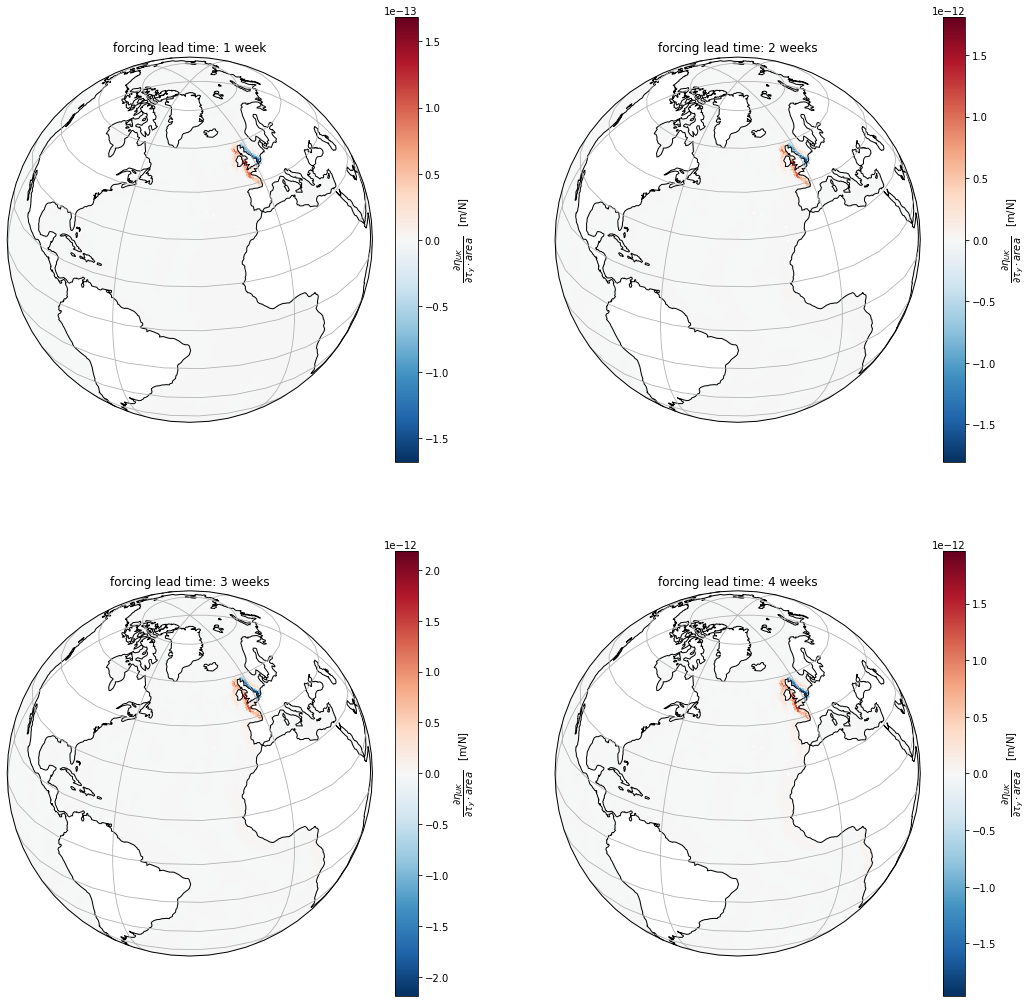

In [4]:
fig,axs = plt.subplots(2,2,figsize=(18,18),
                      subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35,central_latitude=30)})

ds['etaUK_coast_adxx_tauy'].isel(time=204).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[0,0])
                                         
ds['etaUK_coast_adxx_tauy'].isel(time=203).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[0,1])                                         

ds['etaUK_coast_adxx_tauy'].isel(time=202).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[1,0])        

ds['etaUK_coast_adxx_tauy'].isel(time=201).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[1,1])    
for ax in axs.flatten():
    ax.coastlines()
    ax.gridlines()

axs[0,0].set_title('forcing lead time: 1 week');
axs[0,1].set_title('forcing lead time: 2 weeks');
axs[1,0].set_title('forcing lead time: 3 weeks');
axs[1,1].set_title('forcing lead time: 4 weeks');

The sensitivities indicate how (March) monthly mean UK sea level is altered by changes in weekly mean meridional wind stress at the indicated lead time. The first panel shows the sensitivity to $\tau_y$ changes in the last week of March (**lead time: 1 week**). The 4th panel shows the sensitivity to $\tau_y$ changes in the first week of March (**lead time: 4 weeks**). 

The sensitivity patterns do not change much, when increasing the lead time from 1 to 4 weeks. But the **sensitivity amplitude** increases (at least when increasing the lead time from 1 to 3 weeks). This is because wind stress changes in the last week of March (lead time: 1 week) can only change UK sea level in the last week of March, but not in the first three weeks of March. Meanwhile, wind stress changes in the first week of March can affect UK sea level throughout March. Recall that $\eta_{UK}$ is the sea level averaged over the entire month March.

### Lead times: 5 weeks to 8 weeks

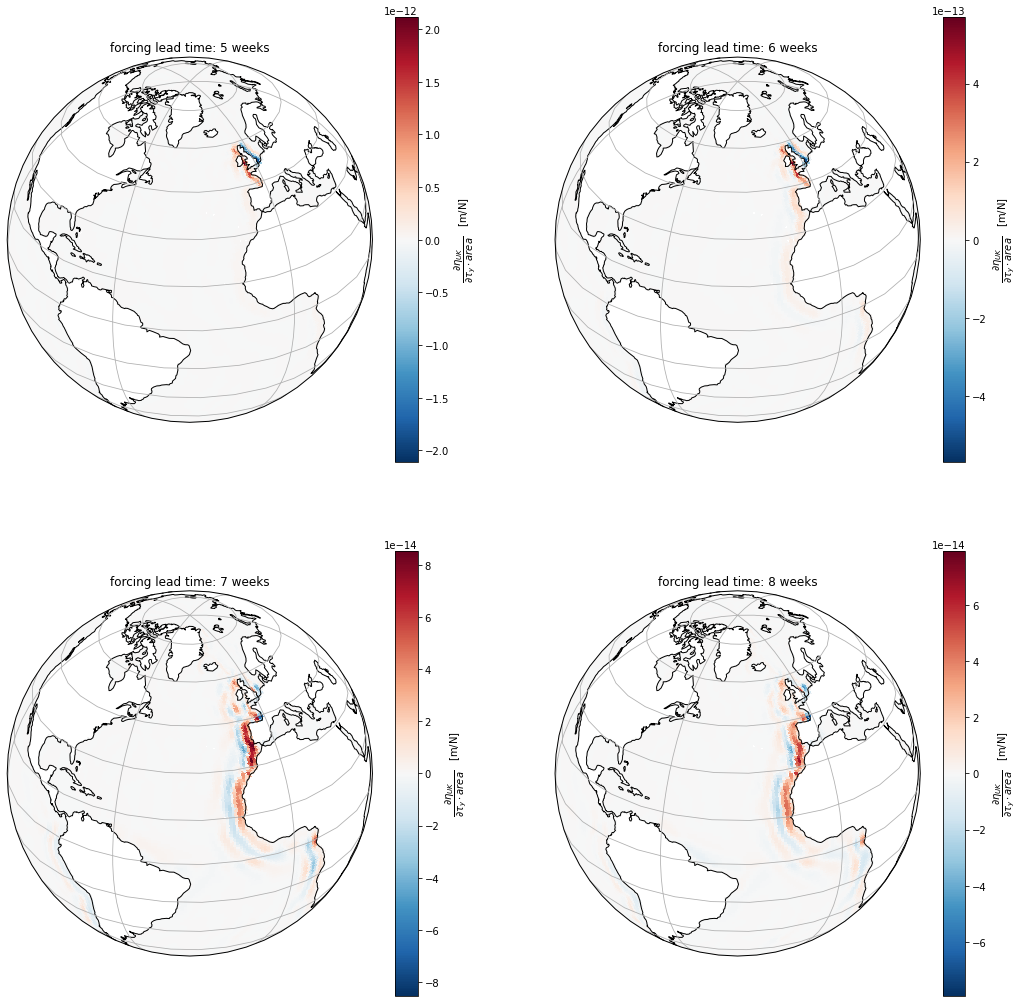

In [5]:
fig,axs = plt.subplots(2,2,figsize=(18,18),
                      subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35,central_latitude=30)})

ds['etaUK_coast_adxx_tauy'].isel(time=200).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[0,0])
                                         
ds['etaUK_coast_adxx_tauy'].isel(time=199).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[0,1])                                         

ds['etaUK_coast_adxx_tauy'].isel(time=198).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[1,0])        

ds['etaUK_coast_adxx_tauy'].isel(time=197).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[1,1])    
for ax in axs.flatten():
    ax.coastlines()
    ax.gridlines()

axs[0,0].set_title('forcing lead time: 5 weeks');
axs[0,1].set_title('forcing lead time: 6 weeks');
axs[1,0].set_title('forcing lead time: 7 weeks');
axs[1,1].set_title('forcing lead time: 8 weeks');

These are sensitivities of March sea level to changes in wind stress in February (for increasing lead weeks). 

**For increasing lead time**,
* the sensitivity band along the eastern Atlantic boundary extends southward
* sensitivity amplitudes become weaker.

### Lead times: 5 weeks &  1 year

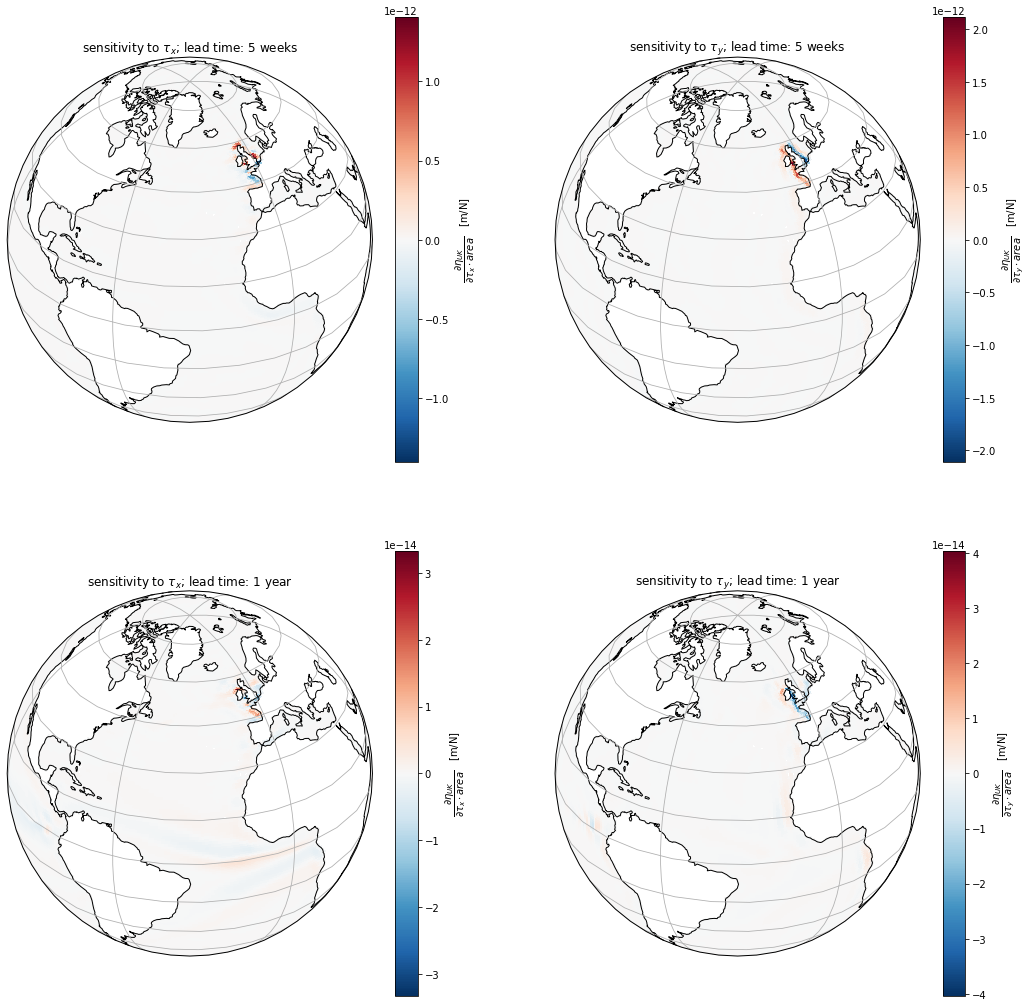

In [6]:
fig,axs = plt.subplots(2,2,figsize=(18,18),
                      subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35,central_latitude=30)})

mytime = 205-5 # lead time: 5 weeks
ds['etaUK_coast_adxx_taux'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_x \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_taux'].units + ']'}, 
                                            ax=axs[0,0])
ds['etaUK_coast_adxx_tauy'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[0,1])
                                
mytime = 205-52 # lead time: 52 weeks ~ 1 year
ds['etaUK_coast_adxx_taux'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_x \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_taux'].units + ']'}, 
                                            ax=axs[1,0])        
ds['etaUK_coast_adxx_tauy'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[1,1])  

for ax in axs.flatten():
    ax.coastlines()
    ax.gridlines()

axs[0,0].set_title(r'sensitivity to $\tau_x$; lead time: 5 weeks');
axs[0,1].set_title(r'sensitivity to $\tau_y$; lead time: 5 weeks');
axs[1,0].set_title(r'sensitivity to $\tau_x$; lead time: 1 year');
axs[1,1].set_title(r'sensitivity to $\tau_y$; lead time: 1 year');

For changes in the weekly-mean wind stress 1 year prior, we still see sensitivity local to the UK coast (although of much smaller amplitude). Also note the wave-like pattern in the South Atlantic, due to Rossby wave dynamics.

### Lead times: 2 years & 3 years

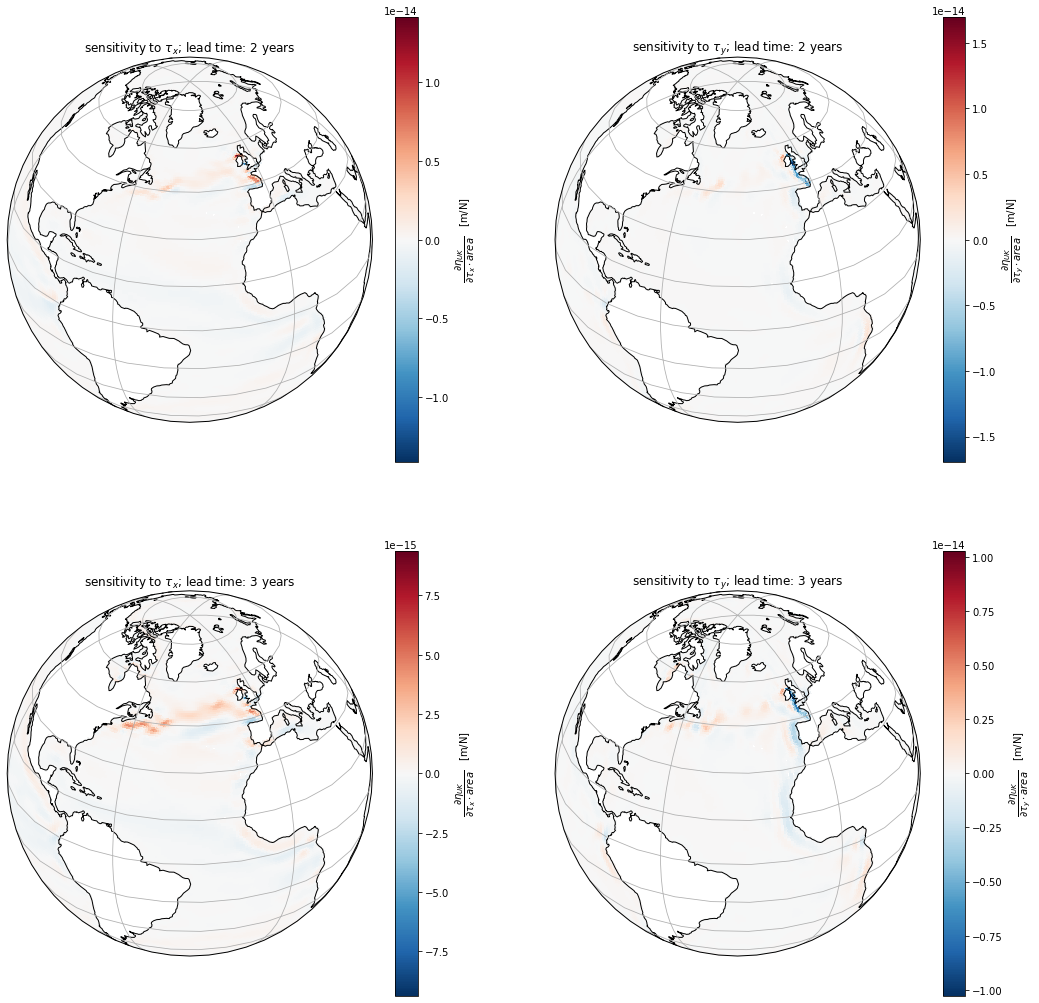

In [7]:
fig,axs = plt.subplots(2,2,figsize=(18,18),
                      subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35,central_latitude=30)})

mytime = 205-2*52 # lead time: 2*52 weeks ~ 2 years
ds['etaUK_coast_adxx_taux'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_x \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_taux'].units + ']'}, 
                                            ax=axs[0,0])       
ds['etaUK_coast_adxx_tauy'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[0,1])   

mytime = 205-3*52 # lead time: 3*52 weeks ~ 3 years
ds['etaUK_coast_adxx_taux'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_x \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_taux'].units + ']'}, 
                                            ax=axs[1,0])    
ds['etaUK_coast_adxx_tauy'].isel(time=mytime).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial \eta_{UK}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds['etaUK_coast_adxx_tauy'].units + ']'}, 
                                            ax=axs[1,1])  
for ax in axs.flatten():
    ax.coastlines()
    ax.gridlines()

axs[0,0].set_title(r'sensitivity to $\tau_x$; lead time: 2 years');
axs[0,1].set_title(r'sensitivity to $\tau_y$; lead time: 2 years');
axs[1,0].set_title(r'sensitivity to $\tau_x$; lead time: 3 years');
axs[1,1].set_title(r'sensitivity to $\tau_y$; lead time: 3 years');

At lead times of several years (here: 2 and 3 years), we see **sensitivity along the intergyre boundary** (the boundary between the subtropical & subpolar gyres) in the North Atlantic. I also observe this sensitivity feature for other "objective functions" in the subpolar North Atlantic at a lead time of 2-3 years (e.g., volume/heat transport across the OSNAP sections, Nordic Seas heat content, Chapter 2 in my PhD thesis: http://bora.uib.no/handle/1956/24456). The observed sensitivity dipole across the intergyre is consistent with previous literature (e.g., Orvik & Skagseth, 2003; Häkkinen & Rhines, 2009), which suggests that wind stress curl anomalies along the intergyre boundary affect the strength/position of North Atlantic surface currents.

## Notes for future work

The following things could be done easily, without very much effort:
* **Different time-averaging/evaluation period**: We could re-compute the sensitivities, but choosing
    * a different length for the **time-averaging window for UK sea level**. E.g., we could choose the averaging window equal to a week or day, rather than a month.
    * a different **evaluation period for UK sea level**. E.g., we could evaluate the sensitivity of UK sea level in (some week of) August 2010, rather than in (some week of) March 1996. *I don't expect the sensitivities along the eastern Atlantic boundary to change much, because they reflect a largely linear response of UK sea level to changes in wind stress. The amplitude of the sensitivities along the intergyre boundary may change, though.*
    * different **frequencies for the sensitivities**. E.g., we could evaluate the impact of *daily-mean* wind stress changes, rather than the impact of *weekly-mean* wind stress changes.
* **Use higher-resolution state estimate ASTE**: We could do the adjoint sensitivity analysis with our regional ocean state estimate ASTE (https://www.essoar.org/doi/10.1002/essoar.10504669.3), whose resolution is 3 times as high as ECCOv4. The southern boundary of the ASTE grid is at 30S (in the Atlantic), so we would catch most of the UK sea level sensitivities along the Eastern boundary of the Atlantic (which extend slightly beyond 30S though).
* Study sensitivity of sea level along **US East coast** rather than UK coast (although other people might be doing this already, as Patrick noted).